<a href="https://colab.research.google.com/github/Aliza1720/ML-Models/blob/main/ML_in_DD_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install chembl_webresource_client

In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [3]:
target = new_client.target
target_query = target.search('5-lipoxygenase activating protein')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,5-lipoxygenase/FLAP,31.0,False,CHEMBL2111402,"[{'accession': 'P09917', 'component_descriptio...",PROTEIN COMPLEX,9606.0
1,"[{'xref_id': 'P20292', 'xref_name': None, 'xre...",Homo sapiens,5-lipoxygenase activating protein,28.0,False,CHEMBL4550,"[{'accession': 'P20292', 'component_descriptio...",SINGLE PROTEIN,9606.0
2,[],Rattus norvegicus,Arachidonate 5-lipoxygenase-activating protein,28.0,False,CHEMBL1921661,"[{'accession': 'P20291', 'component_descriptio...",SINGLE PROTEIN,10116.0
3,[],Mus musculus,Arachidonate 5-lipoxygenase-activating protein,28.0,False,CHEMBL3414408,"[{'accession': 'P30355', 'component_descriptio...",SINGLE PROTEIN,10090.0
4,"[{'xref_id': 'P09917', 'xref_name': None, 'xre...",Homo sapiens,Arachidonate 5-lipoxygenase,23.0,False,CHEMBL215,"[{'accession': 'P09917', 'component_descriptio...",SINGLE PROTEIN,9606.0
...,...,...,...,...,...,...,...,...,...
4787,[],Homo sapiens,NTRK1/NTRK2,0.0,False,CHEMBL4523622,"[{'accession': 'P04629', 'component_descriptio...",PROTEIN FAMILY,9606.0
4788,[],Homo sapiens,IKK2/IKK1,0.0,False,CHEMBL4523969,"[{'accession': 'O14920', 'component_descriptio...",SELECTIVITY GROUP,9606.0
4789,[],Homo sapiens,Geranylgeranyl transferase type-2,0.0,False,CHEMBL4523994,"[{'accession': 'P53611', 'component_descriptio...",PROTEIN COMPLEX,9606.0
4790,[],Rattus norvegicus,Geranylgeranyl transferase type-2,0.0,False,CHEMBL4523995,"[{'accession': 'Q08603', 'component_descriptio...",PROTEIN COMPLEX,10116.0


In [4]:
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL4550'

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)
df.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,122018,[],CHEMBL618421,Binding affinity of compound for 5-lipoxygenas...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,None,None,CHEMBL1129361,J. Med. Chem.,1996,"{'bei': '16.18', 'le': '0.33', 'lle': '-0.37',...",CHEMBL29097,None,CHEMBL29097,7.64,False,http://www.openphacts.org/units/Nanomolar,162523,=,1,True,=,None,IC50,nM,None,23.0,CHEMBL4550,Homo sapiens,5-lipoxygenase activating protein,9606,None,None,IC50,nM,UO_0000065,None,23.0
1,None,516134,[],CHEMBL618420,The compound was tested for the inhibition of ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)CSC(CCCc1ccc(Cl)cc1)c1ccc(OCc2ccc3ccccc3...,None,None,CHEMBL1126364,Bioorg. Med. Chem. Lett.,1992,"{'bei': '14.05', 'le': '0.28', 'lle': '-0.44',...",CHEMBL32842,None,CHEMBL32842,6.91,False,http://www.openphacts.org/units/Nanomolar,45176,=,1,True,=,None,IC50,nM,None,122.0,CHEMBL4550,Homo sapiens,5-lipoxygenase activating protein,9606,None,None,IC50,nM,UO_0000065,None,122.0
2,None,518659,[],CHEMBL618420,The compound was tested for the inhibition of ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,None,None,CHEMBL1126364,Bioorg. Med. Chem. Lett.,1992,"{'bei': '14.95', 'le': '0.28', 'lle': '-0.08',...",CHEMBL281308,None,CHEMBL281308,8.40,False,http://www.openphacts.org/units/Nanomolar,45173,=,1,True,=,None,IC50,nM,None,4.0,CHEMBL4550,Homo sapiens,5-lipoxygenase activating protein,9606,None,None,IC50,nM,UO_0000065,None,4.0


In [8]:
df.to_csv('FLAP_raw_data.csv', index=False)

In [9]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,122018,[],CHEMBL618421,Binding affinity of compound for 5-lipoxygenas...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,None,None,CHEMBL1129361,J. Med. Chem.,1996,"{'bei': '16.18', 'le': '0.33', 'lle': '-0.37',...",CHEMBL29097,None,CHEMBL29097,7.64,False,http://www.openphacts.org/units/Nanomolar,162523,=,1,True,=,None,IC50,nM,None,23.0,CHEMBL4550,Homo sapiens,5-lipoxygenase activating protein,9606,None,None,IC50,nM,UO_0000065,None,23.0
1,None,516134,[],CHEMBL618420,The compound was tested for the inhibition of ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)CSC(CCCc1ccc(Cl)cc1)c1ccc(OCc2ccc3ccccc3...,None,None,CHEMBL1126364,Bioorg. Med. Chem. Lett.,1992,"{'bei': '14.05', 'le': '0.28', 'lle': '-0.44',...",CHEMBL32842,None,CHEMBL32842,6.91,False,http://www.openphacts.org/units/Nanomolar,45176,=,1,True,=,None,IC50,nM,None,122.0,CHEMBL4550,Homo sapiens,5-lipoxygenase activating protein,9606,None,None,IC50,nM,UO_0000065,None,122.0
2,None,518659,[],CHEMBL618420,The compound was tested for the inhibition of ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,None,None,CHEMBL1126364,Bioorg. Med. Chem. Lett.,1992,"{'bei': '14.95', 'le': '0.28', 'lle': '-0.08',...",CHEMBL281308,None,CHEMBL281308,8.40,False,http://www.openphacts.org/units/Nanomolar,45173,=,1,True,=,None,IC50,nM,None,4.0,CHEMBL4550,Homo sapiens,5-lipoxygenase activating protein,9606,None,None,IC50,nM,UO_0000065,None,4.0


In [10]:
len(df2.canonical_smiles.unique())

698

In [11]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr .head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,122018,[],CHEMBL618421,Binding affinity of compound for 5-lipoxygenas...,B,None,None,BAO_0000190,BAO_0000357,single protein format,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,None,None,CHEMBL1129361,J. Med. Chem.,1996,"{'bei': '16.18', 'le': '0.33', 'lle': '-0.37',...",CHEMBL29097,None,CHEMBL29097,7.64,False,http://www.openphacts.org/units/Nanomolar,162523,=,1,True,=,None,IC50,nM,None,23.0,CHEMBL4550,Homo sapiens,5-lipoxygenase activating protein,9606,None,None,IC50,nM,UO_0000065,None,23.0
1,None,516134,[],CHEMBL618420,The compound was tested for the inhibition of ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)CSC(CCCc1ccc(Cl)cc1)c1ccc(OCc2ccc3ccccc3...,None,None,CHEMBL1126364,Bioorg. Med. Chem. Lett.,1992,"{'bei': '14.05', 'le': '0.28', 'lle': '-0.44',...",CHEMBL32842,None,CHEMBL32842,6.91,False,http://www.openphacts.org/units/Nanomolar,45176,=,1,True,=,None,IC50,nM,None,122.0,CHEMBL4550,Homo sapiens,5-lipoxygenase activating protein,9606,None,None,IC50,nM,UO_0000065,None,122.0
2,None,518659,[],CHEMBL618420,The compound was tested for the inhibition of ...,B,None,None,BAO_0000190,BAO_0000357,single protein format,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,None,None,CHEMBL1126364,Bioorg. Med. Chem. Lett.,1992,"{'bei': '14.95', 'le': '0.28', 'lle': '-0.08',...",CHEMBL281308,None,CHEMBL281308,8.40,False,http://www.openphacts.org/units/Nanomolar,45173,=,1,True,=,None,IC50,nM,None,4.0,CHEMBL4550,Homo sapiens,5-lipoxygenase activating protein,9606,None,None,IC50,nM,UO_0000065,None,4.0


In [12]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3.head(3)

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL29097,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,23.0
1,CHEMBL32842,O=C(O)CSC(CCCc1ccc(Cl)cc1)c1ccc(OCc2ccc3ccccc3...,122.0
2,CHEMBL281308,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,4.0


In [13]:
len(df3)

698

In [14]:
df3.to_csv('FLAP_01.csv', index=False)

In [16]:
df4 = pd.read_csv('FLAP_01.csv')

In [18]:
bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 50:
    bioactivity_threshold.append("weakly active")
  elif float(i)  <= 15:
    bioactivity_threshold.append("highly active")  
  else:
    bioactivity_threshold.append("intermediate")

In [20]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL29097,CC(C)c1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,23.0,intermediate
1,CHEMBL32842,O=C(O)CSC(CCCc1ccc(Cl)cc1)c1ccc(OCc2ccc3ccccc3...,122.0,weakly active
2,CHEMBL281308,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,4.0,highly active
3,CHEMBL16596,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,2.0,highly active
4,CHEMBL297661,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,9.3,highly active
...,...,...,...,...
693,CHEMBL4474748,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,47.0,intermediate
694,CHEMBL4563459,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,5.8,highly active
695,CHEMBL4474619,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,34.0,intermediate
696,CHEMBL4542281,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,6.3,highly active


In [21]:
len(df5)

698

In [25]:
df5.to_csv('FLAP_03.csv', index=False)

In [26]:
! zip FLAP.zip *.csv

updating: FLAP_01.csv (deflated 84%)
updating: FLAP_raw_data.csv (deflated 93%)
  adding: FLAP_03.csv (deflated 86%)


In [28]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2021-08-10 10:54:39--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’

Miniconda3-py37_4.8 100%[===================>]  81.12M   162MB/s    in 0.5s    

2021-08-10 10:54:39 (162 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.2’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ | / failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - \ | / failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / - \ | / - \ | / 

In [33]:
! wget https://github.com/Aliza1720/ML-Models/blob/main/FLAP_03.csv

--2021-08-10 10:57:02--  https://github.com/Aliza1720/ML-Models/blob/main/FLAP_03.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘FLAP_03.csv’

FLAP_03.csv             [ <=>                ] 310.45K  --.-KB/s    in 0.06s   

2021-08-10 10:57:03 (4.78 MB/s) - ‘FLAP_03.csv’ saved [317896]



In [34]:
import pandas as pd


In [37]:
df = pd.read_csv('FLAP_03.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL281308,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,4.00,highly active
1,CHEMBL16596,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,2.00,highly active
2,CHEMBL297661,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,9.30,highly active
3,CHEMBL31540,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,2.80,highly active
4,CHEMBL80696,CC(COc1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,8.00,highly active
...,...,...,...,...
581,CHEMBL4526540,Cc1nn(C)cc1NC(=O)[C@@H]1CCCC[C@H]1C(=O)c1ccc(-...,1000.00,weakly active
582,CHEMBL4525999,CC(=O)c1cccc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O...,2511.89,weakly active
583,CHEMBL4447921,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,241.00,weakly active
584,CHEMBL4543414,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3c(C...,101.00,weakly active


In [38]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [39]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [40]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL281308,4.00,highly active,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...
1,CHEMBL16596,2.00,highly active,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...
2,CHEMBL297661,9.30,highly active,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...
3,CHEMBL31540,2.80,highly active,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...
4,CHEMBL80696,8.00,highly active,CC(COc1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...
...,...,...,...,...
581,CHEMBL4526540,1000.00,weakly active,Cc1nn(C)cc1NC(=O)[C@@H]1CCCC[C@H]1C(=O)c1ccc(-...
582,CHEMBL4525999,2511.89,weakly active,CC(=O)c1cccc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O...
583,CHEMBL4447921,241.00,weakly active,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...
584,CHEMBL4543414,101.00,weakly active,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3c(C...


In [41]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [42]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [43]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,561.747,8.48260,1.0,4.0
1,587.185,9.01410,1.0,5.0
2,539.075,7.94572,1.0,4.0
3,513.037,7.43192,1.0,4.0
4,565.179,8.46440,1.0,5.0
...,...,...,...,...
581,390.487,4.35142,2.0,4.0
582,444.531,5.78884,1.0,5.0
583,434.500,2.69472,3.0,6.0
584,448.527,3.15374,3.0,6.0


In [44]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,561.747,8.48260,1.0,4.0
1,587.185,9.01410,1.0,5.0
2,539.075,7.94572,1.0,4.0
3,513.037,7.43192,1.0,4.0
4,565.179,8.46440,1.0,5.0
...,...,...,...,...
581,390.487,4.35142,2.0,4.0
582,444.531,5.78884,1.0,5.0
583,434.500,2.69472,3.0,6.0
584,448.527,3.15374,3.0,6.0


In [45]:
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL281308,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,4.00,highly active
1,CHEMBL16596,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,2.00,highly active
2,CHEMBL297661,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,9.30,highly active
3,CHEMBL31540,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,2.80,highly active
4,CHEMBL80696,CC(COc1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,8.00,highly active
...,...,...,...,...
581,CHEMBL4526540,Cc1nn(C)cc1NC(=O)[C@@H]1CCCC[C@H]1C(=O)c1ccc(-...,1000.00,weakly active
582,CHEMBL4525999,CC(=O)c1cccc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O...,2511.89,weakly active
583,CHEMBL4447921,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,241.00,weakly active
584,CHEMBL4543414,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3c(C...,101.00,weakly active


In [46]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [47]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL281308,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,4.00,highly active,561.747,8.48260,1.0,4.0
1,CHEMBL16596,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,2.00,highly active,587.185,9.01410,1.0,5.0
2,CHEMBL297661,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,9.30,highly active,539.075,7.94572,1.0,4.0
3,CHEMBL31540,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,2.80,highly active,513.037,7.43192,1.0,4.0
4,CHEMBL80696,CC(COc1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,8.00,highly active,565.179,8.46440,1.0,5.0
...,...,...,...,...,...,...,...,...
581,CHEMBL4526540,Cc1nn(C)cc1NC(=O)[C@@H]1CCCC[C@H]1C(=O)c1ccc(-...,1000.00,weakly active,390.487,4.35142,2.0,4.0
582,CHEMBL4525999,CC(=O)c1cccc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O...,2511.89,weakly active,444.531,5.78884,1.0,5.0
583,CHEMBL4447921,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,241.00,weakly active,434.500,2.69472,3.0,6.0
584,CHEMBL4543414,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3c(C...,101.00,weakly active,448.527,3.15374,3.0,6.0


In [48]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [49]:
df_combined.standard_value.describe()

count      586.000000
mean      1011.668993
std       3330.696390
min          0.800000
25%          4.200000
50%         50.120000
75%        317.500000
max      44000.000000
Name: standard_value, dtype: float64

In [50]:
-np.log10( (10**-9)* 100000000 )

1.0

In [51]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [52]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [53]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL281308,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,highly active,561.747,8.48260,1.0,4.0,4.00
1,CHEMBL16596,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,highly active,587.185,9.01410,1.0,5.0,2.00
2,CHEMBL297661,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,highly active,539.075,7.94572,1.0,4.0,9.30
3,CHEMBL31540,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,highly active,513.037,7.43192,1.0,4.0,2.80
4,CHEMBL80696,CC(COc1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,highly active,565.179,8.46440,1.0,5.0,8.00
...,...,...,...,...,...,...,...,...
581,CHEMBL4526540,Cc1nn(C)cc1NC(=O)[C@@H]1CCCC[C@H]1C(=O)c1ccc(-...,weakly active,390.487,4.35142,2.0,4.0,1000.00
582,CHEMBL4525999,CC(=O)c1cccc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O...,weakly active,444.531,5.78884,1.0,5.0,2511.89
583,CHEMBL4447921,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,weakly active,434.500,2.69472,3.0,6.0,241.00
584,CHEMBL4543414,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3c(C...,weakly active,448.527,3.15374,3.0,6.0,101.00


In [54]:
df_norm.standard_value_norm.describe()

count      586.000000
mean      1011.668993
std       3330.696390
min          0.800000
25%          4.200000
50%         50.120000
75%        317.500000
max      44000.000000
Name: standard_value_norm, dtype: float64

In [55]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL281308,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,highly active,561.747,8.48260,1.0,4.0,8.397940
1,CHEMBL16596,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,highly active,587.185,9.01410,1.0,5.0,8.698970
2,CHEMBL297661,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,highly active,539.075,7.94572,1.0,4.0,8.031517
3,CHEMBL31540,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,highly active,513.037,7.43192,1.0,4.0,8.552842
4,CHEMBL80696,CC(COc1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,highly active,565.179,8.46440,1.0,5.0,8.096910
...,...,...,...,...,...,...,...,...
581,CHEMBL4526540,Cc1nn(C)cc1NC(=O)[C@@H]1CCCC[C@H]1C(=O)c1ccc(-...,weakly active,390.487,4.35142,2.0,4.0,6.000000
582,CHEMBL4525999,CC(=O)c1cccc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O...,weakly active,444.531,5.78884,1.0,5.0,5.599999
583,CHEMBL4447921,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,weakly active,434.500,2.69472,3.0,6.0,6.617983
584,CHEMBL4543414,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3c(C...,weakly active,448.527,3.15374,3.0,6.0,6.995679


In [56]:
df_final.pIC50.describe()

count    586.000000
mean       7.337505
std        1.155557
min        4.356547
25%        6.498297
50%        7.299989
75%        8.376751
max        9.096910
Name: pIC50, dtype: float64

In [57]:
df_final.to_csv('FLAP_04.csv')

In [58]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL281308,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,highly active,561.747,8.48260,1.0,4.0,8.397940
1,CHEMBL16596,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,highly active,587.185,9.01410,1.0,5.0,8.698970
2,CHEMBL297661,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,highly active,539.075,7.94572,1.0,4.0,8.031517
3,CHEMBL31540,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,highly active,513.037,7.43192,1.0,4.0,8.552842
4,CHEMBL80696,CC(COc1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,highly active,565.179,8.46440,1.0,5.0,8.096910
...,...,...,...,...,...,...,...,...
581,CHEMBL4526540,Cc1nn(C)cc1NC(=O)[C@@H]1CCCC[C@H]1C(=O)c1ccc(-...,weakly active,390.487,4.35142,2.0,4.0,6.000000
582,CHEMBL4525999,CC(=O)c1cccc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O...,weakly active,444.531,5.78884,1.0,5.0,5.599999
583,CHEMBL4447921,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,weakly active,434.500,2.69472,3.0,6.0,6.617983
584,CHEMBL4543414,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3c(C...,weakly active,448.527,3.15374,3.0,6.0,6.995679


In [60]:
df_2class.to_csv('FLAP_05.csv')

In [61]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

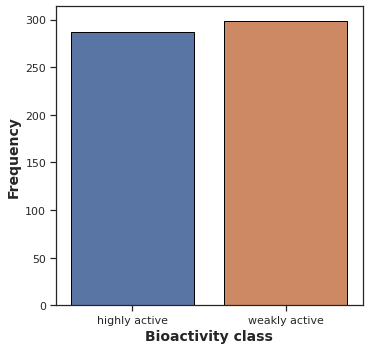

In [62]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

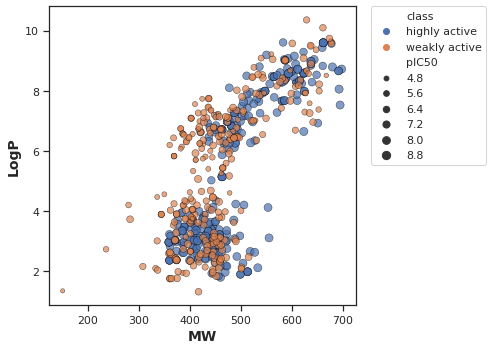

In [63]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

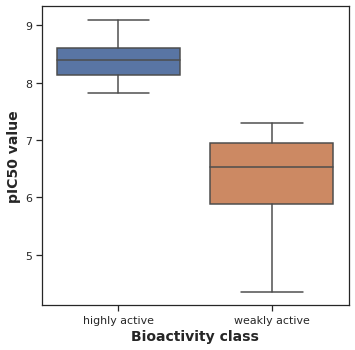

In [64]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [65]:

def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [66]:
mannwhitney('pIC50')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,0.0,0.05,Different distribution (reject H0)


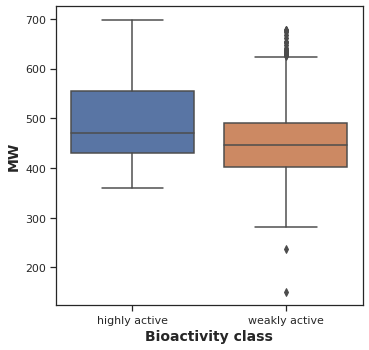

In [67]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [68]:
mannwhitney('MW')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,0.0,0.0,0.05,Different distribution (reject H0)


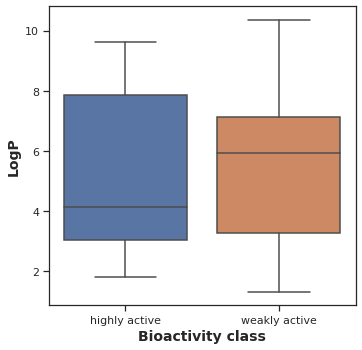

In [69]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [70]:
mannwhitney('LogP')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,0.0,0.0,0.05,Different distribution (reject H0)


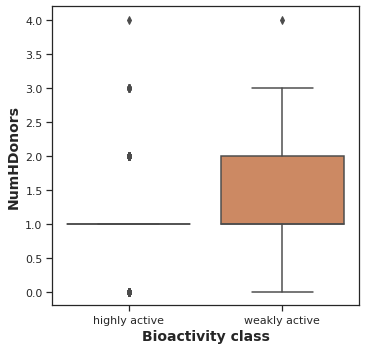

In [71]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [72]:
mannwhitney('NumHDonors')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,0.0,0.0,0.05,Different distribution (reject H0)


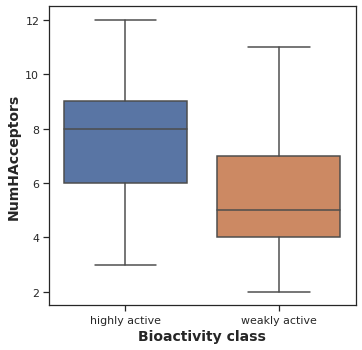

In [73]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [74]:
mannwhitney('NumHAcceptors')


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:6415: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,0.0,0.0,0.05,Different distribution (reject H0)


In [75]:
! zip -r results.zip . -i *.csv *.pdf

  adding: FLAP_raw_data.csv (deflated 93%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: FLAP_01.csv (deflated 84%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: FLAP_04.csv (deflated 80%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 13%)
  adding: mannwhitneyu_LogP.csv (deflated 11%)
  adding: plot_ic50.pdf (deflated 37%)
  adding: mannwhitneyu_MW.csv (deflated 11%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 13%)
  adding: FLAP_03.csv (deflated 85%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 14%)
  adding: plot_MW.pdf (deflated 38%)
  adding: FLAP_05.csv (deflated 80%)
  adding: plot_MW_vs_LogP.pdf (deflated 5%)


In [76]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2021-08-10 11:00:41--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2021-08-10 11:00:41--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  56.3MB/s    in 0.4s    

2021-08-10 11:00:41 (56.3 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2021-08-10 11:00:41--  https://githu

In [80]:
! unzip padel.zip

Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [81]:
! wget https://github.com/Aliza1720/ML-Models/blob/main/FLAP_04.csv 

--2021-08-10 11:05:44--  https://github.com/Aliza1720/ML-Models/blob/main/FLAP_04.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘FLAP_04.csv.2’

FLAP_04.csv.2           [ <=>                ] 411.00K  --.-KB/s    in 0.06s   

2021-08-10 11:05:44 (6.65 MB/s) - ‘FLAP_04.csv.2’ saved [420860]



In [82]:
import pandas as pd


In [83]:
df3 = pd.read_csv('FLAP_04.csv')

In [84]:
df3


,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL281308,O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2cc...,highly active,561.747,8.48260,1.0,4.0,8.397940
1,1,CHEMBL16596,CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2...,highly active,587.185,9.01410,1.0,5.0,8.698970
2,2,CHEMBL297661,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,highly active,539.075,7.94572,1.0,4.0,8.031517
3,3,CHEMBL31540,Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3...,highly active,513.037,7.43192,1.0,4.0,8.552842
4,4,CHEMBL80696,CC(COc1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n...,highly active,565.179,8.46440,1.0,5.0,8.096910
...,...,...,...,...,...,...,...,...,...
581,581,CHEMBL4526540,Cc1nn(C)cc1NC(=O)[C@@H]1CCCC[C@H]1C(=O)c1ccc(-...,weakly active,390.487,4.35142,2.0,4.0,6.000000
582,582,CHEMBL4525999,CC(=O)c1cccc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O...,weakly active,444.531,5.78884,1.0,5.0,5.599999
583,583,CHEMBL4447921,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3cnn...,weakly active,434.500,2.69472,3.0,6.0,6.617983
584,584,CHEMBL4543414,Cc1cc(-c2ccc(C(=O)[C@@H]3CCCC[C@H]3C(=O)Nc3c(C...,weakly active,448.527,3.15374,3.0,6.0,6.995679


In [85]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [86]:
! cat molecule.smi | head -5

O=C(O)CSC(CCCc1ccccc1)(CCc1ccccc1)c1ccc(OCc2ccc3ccccc3n2)cc1	CHEMBL281308
CC(C)(C)Sc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3ccc4ccccc4n3)cc12	CHEMBL16596
Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3ccc(-c4ccccc4)cn3)cc12	CHEMBL297661
Cc1c(CC(C)(C)C(=O)O)n(Cc2ccc(Cl)cc2)c2ccc(OCc3ccc4ccccc4n3)cc12	CHEMBL31540
CC(COc1ccc2c(c1)c(SC(C)(C)C)c(CC(C)(C)C(=O)O)n2Cc1ccc(Cl)cc1)c1ccccn1	CHEMBL80696


In [87]:
! cat molecule.smi | wc -l

586


In [88]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [89]:
! bash padel.sh

Processing CHEMBL281308 in molecule.smi (1/586). 
Processing CHEMBL16596 in molecule.smi (2/586). 
Processing CHEMBL297661 in molecule.smi (3/586). Average speed: 7.44 s/mol.
Processing CHEMBL31540 in molecule.smi (4/586). Average speed: 4.03 s/mol.
Processing CHEMBL433133 in molecule.smi (6/586). Average speed: 3.42 s/mol.
Processing CHEMBL80696 in molecule.smi (5/586). Average speed: 3.41 s/mol.
Processing CHEMBL38545 in molecule.smi (7/586). Average speed: 2.41 s/mol.
Processing CHEMBL80287 in molecule.smi (8/586). Average speed: 2.06 s/mol.
Processing CHEMBL78013 in molecule.smi (9/586). Average speed: 1.97 s/mol.
Processing CHEMBL79383 in molecule.smi (10/586). Average speed: 1.75 s/mol.
Processing CHEMBL79881 in molecule.smi (11/586). Average speed: 1.70 s/mol.
Processing CHEMBL289751 in molecule.smi (12/586). Average speed: 1.57 s/mol.
Processing CHEMBL80158 in molecule.smi (13/586). Average speed: 1.53 s/mol.
Processing CHEMBL78854 in molecule.smi (14/586). Average speed: 1.55 

In [90]:
! ls -l

total 277856
-rw-r--r-- 1 root root  1053099 Aug 10 11:09 descriptors_output.csv
-rw-r--r-- 1 root root    56245 Aug 10 10:47 FLAP_01.csv
-rw-r--r-- 1 root root    55506 Aug 10 10:57 FLAP_03.csv
-rw-r--r-- 1 root root    90386 Aug 10 10:59 FLAP_04.csv
-rw-r--r-- 1 root root   425397 Aug 10 11:04 FLAP_04.csv.1
-rw-r--r-- 1 root root   420860 Aug 10 11:05 FLAP_04.csv.2
-rw-r--r-- 1 root root    90386 Aug 10 10:59 FLAP_05.csv
-rw-r--r-- 1 root root   720431 Aug 10 10:47 FLAP_raw_data.csv
-rw-r--r-- 1 root root    69906 Aug 10 10:53 FLAP.zip
drwxr-xr-x 3 root root     4096 Aug 10 08:03 __MACOSX
-rw-r--r-- 1 root root      101 Aug 10 11:00 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root       99 Aug 10 11:00 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      110 Aug 10 11:00 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      107 Aug 10 11:00 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root      102 Aug 10 11:00 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Minicond

In [91]:
df3_X = pd.read_csv('descriptors_output.csv')

In [92]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL16596,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CHEMBL281308,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CHEMBL297661,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CHEMBL31540,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CHEMBL80696,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,CHEMBL4526540,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
582,CHEMBL4447921,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
583,CHEMBL4525999,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
584,CHEMBL4560241,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
582,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
583,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
584,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [94]:
df3_Y = df3['pIC50']
df3_Y

0      8.397940
1      8.698970
2      8.031517
3      8.552842
4      8.096910
         ...   
581    6.000000
582    5.599999
583    6.617983
584    6.995679
585    6.173925
Name: pIC50, Length: 586, dtype: float64

In [95]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.397940
1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.698970
2,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.031517
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.552842
4,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.000000
582,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.599999
583,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.617983
584,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.995679


In [96]:
dataset3.to_csv('FLAP_06.csv', index=False)

In [97]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [98]:
! wget https://github.com/Aliza1720/ML-Models/blob/main/FLAP_06.csv

--2021-08-10 11:10:50--  https://github.com/Aliza1720/ML-Models/blob/main/FLAP_06.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘FLAP_06.csv.1’

FLAP_06.csv.1           [ <=>                ] 117.00K  --.-KB/s    in 0.04s   

2021-08-10 11:10:50 (3.10 MB/s) - ‘FLAP_06.csv.1’ saved [119810]



In [100]:
df = pd.read_csv('FLAP_06.csv')

In [101]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
582,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
583,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
584,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
Y = df.pIC50
Y

0      8.397940
1      8.698970
2      8.031517
3      8.552842
4      8.096910
         ...   
581    6.000000
582    5.599999
583    6.617983
584    6.995679
585    6.173925
Name: pIC50, Length: 586, dtype: float64

In [103]:

X.shape

(586, 881)

In [104]:
Y.shape

(586,)

In [129]:
from sklearn.feature_selection import VarianceThreshold

In [130]:
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [107]:
X.shape

(586, 174)

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [132]:
X_train.shape, Y_train.shape

((468, 174), (468,))

In [110]:
X_test.shape, Y_test.shape

((118, 174), (118,))

In [134]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5649217332611867

In [135]:
Y_pred = model.predict(X_test)

<function matplotlib.pyplot.show>

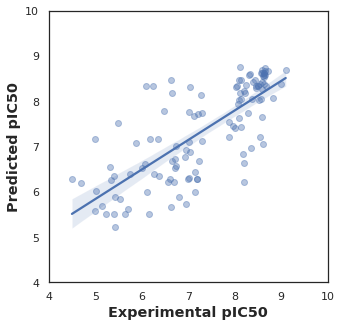

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(4, 10)
ax.set_ylim(4, 10)
ax.figure.set_size_inches(5, 5)
plt.show

In [114]:
! pip install lazypredict

Processing /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653/PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl
ERROR: requests-cache 0.7.2 has requirement pyyaml>=5.4, but you'll have pyyaml 5.3.1 which is incompatible.
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.4.1
    Uninstalling PyYAML-5.4.1:
      Successfully uninstalled PyYAML-5.4.1


In [115]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [116]:
! wget https://github.com/Aliza1720/ML-Models/blob/main/FLAP_06.csv

--2021-08-10 11:12:06--  https://github.com/Aliza1720/ML-Models/blob/main/FLAP_06.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘FLAP_06.csv.2’

FLAP_06.csv.2           [ <=>                ] 117.00K  --.-KB/s    in 0.04s   

2021-08-10 11:12:06 (3.16 MB/s) - ‘FLAP_06.csv.2’ saved [119811]



In [117]:
df = pd.read_csv('FLAP_06.csv')

In [118]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

In [119]:
X.shape

(586, 881)

In [120]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(586, 174)

In [142]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

 92%|█████████▏| 35/38 [00:18<00:01,  2.97it/s]

[11:33:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 38/38 [00:00<00:00, 7823.66it/s]


In [143]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GaussianProcessRegressor,0.86,0.91,0.34,0.13
ExtraTreeRegressor,0.86,0.91,0.34,0.03
DecisionTreeRegressor,0.86,0.91,0.34,0.03
ExtraTreesRegressor,0.86,0.91,0.34,0.86
RandomForestRegressor,0.79,0.87,0.41,0.82
BaggingRegressor,0.77,0.85,0.44,0.10
MLPRegressor,0.70,0.81,0.50,1.27
LGBMRegressor,0.65,0.78,0.53,0.12
HistGradientBoostingRegressor,0.65,0.78,0.53,1.41


In [144]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


[(0.0, 1.0)]

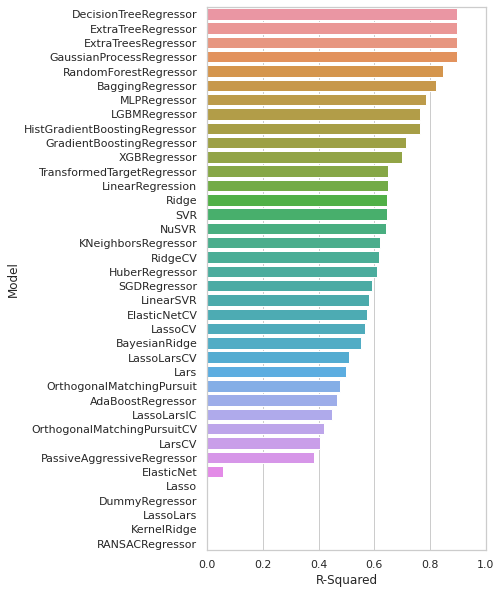

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

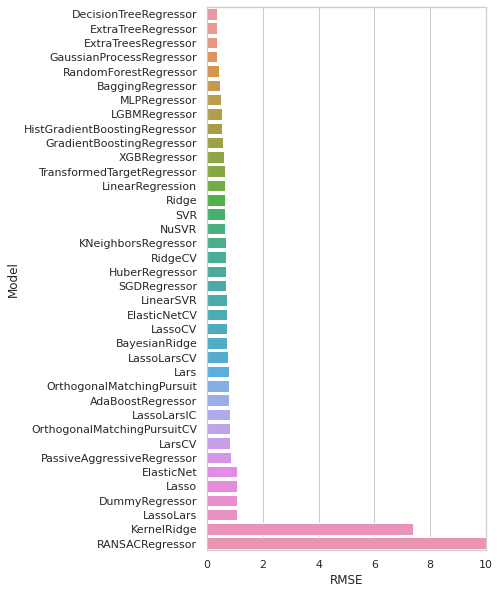

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))